### Plotting ETNP CTD data from SQK17 cruise, station P2

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#from matplotlib_venn import venn2
#from matplotlib_venn import venn3
from matplotlib_venn import venn3, venn3_circles
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/CTD/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/CTD


In [3]:
# read in as a dataframe the CTD datafile, a csv

sta2 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/CTD/skq201617S_stationp2_ctd.csv")

sta2.head()

,Cruise,Station,mon/dd/yyyy,hh:mm,Longitude [degrees east],Latitude [degrees north],Bottom Depth [m],Pressure [db],Depth (m),Temperature [degrees C],Temperature 2 [degrees C],Salinity [psu],Salinity 2 [psu],Fluorescence [mg/m^3],Beam Transmission [%],% PAR,Oxygen [umol/kg],Oxygen [% saturation]
0,SKQ201617S,sta013,12/29/16,4:05,-104.55608,16.81572,3141,3.018,2.989895,28.4659,28.4657,33.9836,33.9934,0.115,96.4539,0.563,196.512,99.925
1,SKQ201617S,sta013,12/29/16,4:05,-104.55604,16.81572,3141,4.024,3.986527,28.4648,28.4643,33.9840,33.9936,0.107,96.5086,0.450,196.541,99.938
2,SKQ201617S,sta013,12/29/16,4:05,-104.55604,16.81572,3141,5.030,4.983158,28.4655,28.4646,33.9839,33.9937,0.110,96.5249,0.304,196.655,99.998
3,SKQ201617S,sta013,12/29/16,4:05,-104.55603,16.81572,3141,6.036,5.979790,28.4644,28.4641,33.9841,33.9937,0.106,96.5022,0.248,196.963,100.153
4,SKQ201617S,sta013,12/29/16,4:05,-104.55602,16.81572,3141,7.042,6.976422,28.4685,28.4684,33.9838,33.9933,0.108,96.5036,0.207,197.203,100.281


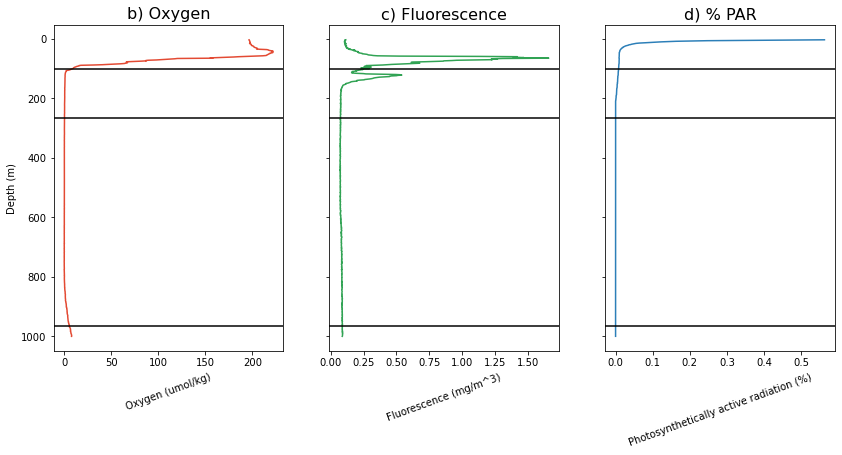

In [48]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 6))

ax1.plot(sta2['Oxygen [umol/kg]'], sta2['Depth (m)'], color = '#e34a33')
ax1.invert_yaxis() 
ax1.set_title('b) Oxygen', fontsize = 16)
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Oxygen (umol/kg)', rotation = 20)
#ax1.hlines(100, 0, 200, colors='k', linestyles='solid', label='sample')
ax1.axhline(y=100, xmin=0, xmax=1, color = 'black')
ax1.axhline(y=265, xmin=0, xmax=1, color = 'black')
ax1.axhline(y=965, xmin=0, xmax=1, color = 'black')

ax2.plot(sta2['Fluorescence [mg/m^3]'], sta2['Depth (m)'], color = '#31a354')
ax2.set_title('c) Fluorescence', fontsize = 16)
#ax2.set_ylabel('Depth (m)')
ax2.set_xlabel('Fluorescence (mg/m^3)', rotation = 20)
ax2.axhline(y=100, xmin=0, xmax=1, color = 'black')
ax2.axhline(y=265, xmin=0, xmax=1, color = 'black')
ax2.axhline(y=965, xmin=0, xmax=1, color = 'black')

ax3.plot(sta2['% PAR'], sta2['Depth (m)'], color = '#2c7fb8')
ax3.set_title('d) % PAR', fontsize = 16)
#ax3.set_ylabel('Depth (m)')
ax3.set_xlabel('Photosynthetically active radiation (%)', rotation = 20)
ax3.axhline(y=100, xmin=0, xmax=1, color = 'black')
ax3.axhline(y=265, xmin=0, xmax=1, color = 'black')
ax3.axhline(y=965, xmin=0, xmax=1, color = 'black')

#save plot

plt.savefig("SKQ17-stationP2-profile.png")

# also save in manuscript latex dir high res
plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/SKQ17-stationP2-profile.png", dpi = 300, bbox_inches='tight')

### I installed folium on 12.09.20

### !pip install folium

Collecting folium
  Downloading folium-0.11.0-py2.py3-none-any.whl (93 kB) \
     |████████████████████████████████| 93 kB 27 kB/s  eta 0:00:01 \
Requirement already satisfied: jinja2>=2.9 in /home/millieginty/anaconda3/lib/python3.8/site-packages (from folium) (2.11.2)\
Collecting branca>=0.3.0\
  Downloading branca-0.4.1-py3-none-any.whl (24 kB)\
Requirement already satisfied: numpy in /home/millieginty/anaconda3/lib/python3.8/site-packages (from folium) (1.18.5)\
Requirement already satisfied: requests in /home/millieginty/anaconda3/lib/python3.8/site-packages (from folium) (2.24.0)\
Requirement already satisfied: MarkupSafe>=0.23 in /home/millieginty/anaconda3/lib/python3.8/site-packages (from jinja2>=2.9->folium) (1.1.1)\
Requirement already satisfied: idna<3,>=2.5 in /home/millieginty/anaconda3/lib/python3.8/site-packages (from requests->folium) (2.10)\
Requirement already satisfied: certifi>=2017.4.17 in /home/millieginty/anaconda3/lib/python3.8/site-packages (from requests->folium) (2020.6.20)\
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /home/millieginty/anaconda3\/lib/python3.8/site-packages (from requests->folium) (1.25.9)\
Requirement already satisfied: chardet<4,>=3.0.2 in /home/millieginty/anaconda3/lib/python3.8/site-packages \(from requests->folium) (3.0.4)\
Installing collected packages: branca, folium\
Successfully installed branca-0.4.1 folium-0.11.0\


In [39]:
import folium
map = folium.Map(location=[20.0, -107.5], default_zoom_start=500)

# Station 136 from Thompson 2012 cruise, metagenomes from here:
folium.Marker(
    location=[17.043, -106.543],
    popup='TGT2012 Station 136',
    tooltip = "Click for more",
    color = 'red'
).add_to(map)

# Station BB2 from Thompson 2012 cruise, metagenomes from here:
folium.Marker(
    location=[16.527, -107.148],
    popup='TGT2012 Station BB2',
    tooltip = "Click for more"
).add_to(map)

# Station P2 from Sikuliq 2017 cruise, proteomics samples from here:
folium.Marker(
    location=[16.58, -107.05],
    color='green',
    popup='SKQ17 Station P2',
    tooltip = "Click for more"
).add_to(map)

folium.CircleMarker(location=[16.58, -107.65],
                        radius=2,
                        weight=0).add_to(map)

In [40]:
map